# Data Description

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
Attribute Information:

Input variables:
**bank client data:**
1. age (numeric)

2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)
>The Consumer Price Index measures the average change in prices over time that consumers pay for a basket of goods and services.It is based upon the index average for the period from 1982 through 1984 (inclusive) which was set to 100. So a CPI reading of 100 means that there has been zero inflation since 1984 while readings of 175 and 225 would indicate a rise in the inflation level of 75% and 125% respectively. The quoted inflation rate is actually the change in the index from the prior period, whether it is monthly, quarterly or yearly.[More information about CPI](https://www.investopedia.com/terms/c/consumerpriceindex.asp)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
>The Consumer Confidence Index (CCI) is based on the premise that if consumers are optimistic, they tend to purchase more goods and services, which should, inevitably, stimulate the whole economy.The CCI is released on the last Tuesday of every month and is widely regarded as the most credible gauge of U.S. consumer confidence.[More information about CCI](https://www.investopedia.com/terms/c/cci.asp)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)
>The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months.The Euribor interest rates are the most important European interbank interest rates.
20. nr.employed: number of employees - quarterly indicator (numeric)


**Output variable (desired target):**
21. y - has the client subscribed a term deposit? (binary: 'yes','no')



# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
plt.style.use('seaborn-dark')
sns.set_style('darkgrid')

import pickle
#normalizing dataset
from sklearn.preprocessing import StandardScaler
#creating training and testing sets
from sklearn.model_selection import train_test_split
#logistic regression
from sklearn.linear_model import LogisticRegression

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Evaluating models
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

#PCA
from sklearn.decomposition import PCA

#RandomForest
np.random.seed(123)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#grid search cross validation
from sklearn.model_selection import GridSearchCV, cross_val_score

# Making a class to organize information

In [2]:
class result(object):
    def __init__(self, params=None, preds=None):
        self.params = params#parameter used, dictionary
        self.preds = preds#[train_preds, test_preds]
        self.data = None
        self.note = None
        
    def print_metrics(self):
        print('Train set\n')
        print("Precision Score: {}".format(precision_score(y_train, self.preds['train_preds'])))
        print("Recall Score: {}".format(recall_score(y_train, self.preds['train_preds'])))
        print("Accuracy Score: {}".format(accuracy_score(y_train, self.preds['train_preds'])))
        print("F1 Score: {}".format(f1_score(y_train, self.preds['train_preds'])))
        print('\n')
        
        print('Test set\n')
        print("Precision Score: {}".format(precision_score(y_test, self.preds['test_preds'])))
        print("Recall Score: {}".format(recall_score(y_test, self.preds['test_preds'])))
        print("Accuracy Score: {}".format(accuracy_score(y_test, self.preds['test_preds'])))
        print("F1 Score: {}".format(f1_score(y_test, self.preds['test_preds'])))
        print('\n')

# Save and load results

### Loading the results that saved

This section is used when you want to just check the modeling results without running everything. 

`Results` is the dictionary name that used to save the objects of the `result` class. The keys are the name of the objects. 

```python

 Results = {'data_preprocessed':data_preprocessed,
            'KNN_optimized':KNN_optimized,
            'PCA': PCA,
            'KNN_PCA':KNN_PCA,
           'data_before_scaled':data_before_scaled}
```
**The `result` class definition needs to be run first before running following codes to load the pickle file. Otherwise, it will throw an error.**  

In [3]:
#Need to execute the class definition above. 
with open('result.pickle', 'rb') as f:
    Results = pickle.load(f)

In [4]:
Results.keys()

dict_keys(['data_preprocessed', 'KNN_optimized', 'PCA', 'KNN_PCA', 'rand_forest_optimized', 'data_before_scaled'])

Assign the variable names to the objects saved in the dictionary to be used in the rest of the notebook. 

In [5]:
KNN_optimized = Results['KNN_optimized']
PCA = Results['PCA']
KNN_PCA = Results['KNN_PCA']
data_preprocessed = Results['data_preprocessed']
rand_forest_optimized = Results['rand_forest_optimized']
data_before_scaled = Results['data_before_scaled']

In [6]:
data_before_scaled.data.keys()

dict_keys(['df', 'features', 'target'])

In [7]:
df = data_before_scaled.data['df']
features = data_before_scaled.data['features']
target = data_before_scaled.data['target']

In [8]:
data_preprocessed.data.keys()

dict_keys(['scaled_X_train', 'scaled_X_test', 'scaled_df_train', 'y_train', 'y_test'])

In [9]:
scaled_X_train = data_preprocessed.data['scaled_X_train']
scaled_X_test = data_preprocessed.data['scaled_X_test']
y_train = data_preprocessed.data['y_train']
y_test = data_preprocessed.data['y_test']
scaled_df_train = data_preprocessed.data['scaled_df_train']

### Pickle `Result` 
This section is to save the dictionary consisting of the `result` objects containing the model results. 

In [57]:
Results.keys()

dict_keys(['data_preprocessed', 'KNN_optimized', 'PCA', 'KNN_PCA', 'rand_forest_optimized', 'data_before_scaled'])

In [58]:
with open('result.pickle','wb') as f:
    pickle.dump(Results, f, pickle.HIGHEST_PROTOCOL)

# Loading and Preprocessing the Dataset

#### Loading the Dataset

In [11]:
df = pd.read_csv('bank-additional-full.csv',sep = ';')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Following the data description, we drop `duration`.

In [14]:
df.drop('duration', axis =1, inplace=True)

In [15]:
df.job.dtype =='O'

True

Checking missing values in categorical features

In [16]:
for column in df.columns:
    if df[column].dtype =='O':
        print(column)
        print(df[column].value_counts())
        print('\n')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


contact
cellular     26144
telephone    15044
Nam

Checking collinear relationship

In [17]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

#### `pdays` 
Since most rows has 999 for the column `pdays` which indicating never contacted for a previous campaign, the continuous variable 'pdays' is transformed into a categorical variable with the increment of a week.  

In [18]:
days  = list(range(0,35,7)) 
days.append(999)
pdays_wk ={}
for i in range(len(days)):
    if i == 0:
        pdays_wk['less_1day'] = df[df.pdays == 0].index
    elif i < 5 :
        wk = int(days[i]/7)
        key = f'less_{wk}week'
        pdays_wk[key] = df[(df.pdays>days[i-1])&(df.pdays<= days[i])].index
    else:
        pdays_wk['never_contacted'] = df[df.pdays == days[i]].index

wks = list(pdays_wk.keys())
for wk in wks:
    df.loc[pdays_wk[wk], 'pdays']= wk

In [19]:
df.pdays.value_counts()

never_contacted    39673
less_1week          1162
less_2week           276
less_3week            56
less_1day             15
less_4week             6
Name: pdays, dtype: int64

#### `y`, target variable
The labels in the target variable `y` was encoded with 0 for *"no"* and 1 for *"yes"*

In [20]:
le = preprocessing.LabelEncoder()
le.fit(df.y)
le.classes_

array(['no', 'yes'], dtype=object)

In [21]:
df.y = le.transform(df.y)

#### Renaming columns

Change the colume names that contain `.` with `-` 

In [22]:
cols = list(df.columns)
for i, string in enumerate(cols):
    cols[i]=string.replace('.','_')
cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [23]:
df.columns = cols

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Make a copy of the dataframe just in case. 

In [25]:
df_before = df.copy()

In [26]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null object
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int32
dtypes: float64(5), int32(1), int64(3), object(11)
memory usage: 6.1+ MB


#### Getting dummy variables 

In [27]:
target = df.y
features = df[df.columns[:-1]]

In [28]:
features = pd.get_dummies(features, drop_first=True)

In [29]:
features.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,job_entrepreneur,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_less_1week,pdays_less_2week,pdays_less_3week,pdays_less_4week,pdays_never_contacted,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
features.columns

Index(['age', 'campaign', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_less_1week', 'pdays_less_2week',
       'pdays_le

# EDA exploratory data analysis

#### Detecting collinearity

In [11]:
def strongCorr(df, limit):
    corrMat = df.corr()
    for col in corrMat.columns:
        if sum(abs(corrMat[col])>limit) > 1:
            print('the correlation is higher than {} with {}'.format(limit, col),
                  '\n',corrMat.loc[abs(corrMat[col])>limit][col],'\n')

In [12]:
def strongCorr1(df, limit):
    corrMat = df.corr()
    correlated =[]
    for col in corrMat.columns:
        if sum(abs(corrMat[col])>limit) > 1:
            
            names = list(corrMat.loc[abs(corrMat[col])>limit].index)
            for x in names:
                if x != col:
                   # print('drop {} strongly correlated with {}.'.format(x,col))
                    correlated.append(x)
            corrCount = dict((x,correlated.count(x)) for x in set(correlated))
    return list(set(correlated)), corrCount

In [33]:
def corrcoef_target(feature_list):
    '''
    input
    features_list: list of features whose corr matrices 
    with target variable are going to be created.
    the list of features can be obtained using strongCorr1 function. 
    
    output
    corr. matrices
    '''
    for feature in feature_list:
        print(feature)
        print(np.corrcoef(target, features[feature]))
        print('\n')

In [34]:
strongCorr(features, 0.9)

the correlation is higher than 0.9 with emp_var_rate 
 emp_var_rate    1.000000
euribor3m       0.972245
nr_employed     0.906970
Name: emp_var_rate, dtype: float64 

the correlation is higher than 0.9 with euribor3m 
 emp_var_rate    0.972245
euribor3m       1.000000
nr_employed     0.945154
Name: euribor3m, dtype: float64 

the correlation is higher than 0.9 with nr_employed 
 emp_var_rate    0.906970
euribor3m       0.945154
nr_employed     1.000000
Name: nr_employed, dtype: float64 

the correlation is higher than 0.9 with housing_unknown 
 housing_unknown    1.0
loan_unknown       1.0
Name: housing_unknown, dtype: float64 

the correlation is higher than 0.9 with loan_unknown 
 housing_unknown    1.0
loan_unknown       1.0
Name: loan_unknown, dtype: float64 

the correlation is higher than 0.9 with pdays_never_contacted 
 pdays_never_contacted    1.000000
poutcome_success        -0.950283
Name: pdays_never_contacted, dtype: float64 

the correlation is higher than 0.9 with poutcom

In [35]:
feature_list, corrCount= strongCorr1(features,0.9)
print(feature_list,'\n', corrCount)

['euribor3m', 'loan_unknown', 'emp_var_rate', 'nr_employed', 'poutcome_success', 'pdays_never_contacted', 'housing_unknown'] 
 {'euribor3m': 2, 'loan_unknown': 1, 'emp_var_rate': 2, 'nr_employed': 2, 'poutcome_success': 1, 'pdays_never_contacted': 1, 'housing_unknown': 1}


In [36]:
corrcoef_target(feature_list)

euribor3m
[[ 1.        -0.3077714]
 [-0.3077714  1.       ]]


loan_unknown
[[ 1.         -0.00227003]
 [-0.00227003  1.        ]]


emp_var_rate
[[ 1.         -0.29833443]
 [-0.29833443  1.        ]]


nr_employed
[[ 1.        -0.3546783]
 [-0.3546783  1.       ]]


poutcome_success
[[1.         0.31626938]
 [0.31626938 1.        ]]


pdays_never_contacted
[[ 1.        -0.3248767]
 [-0.3248767  1.       ]]


housing_unknown
[[ 1.         -0.00227003]
 [-0.00227003  1.        ]]




All `euribor3m`, `emp_var_rate`, and `nr_employed` are metrics that reflect the economic situation in Europe and they are highly correlated. So we will keep `euribor3m` and drop the other two variables. 

In [37]:
features.drop(['nr_employed','emp_var_rate'],axis =1, inplace = True)

Also we see that `loan_unknown` and `housing_unknown` are perfectly correlated so `housing_unknown` is dropped. 

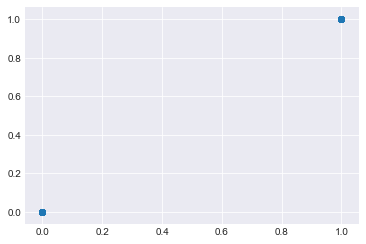

In [38]:
plt.scatter(features.housing_unknown, features.loan_unknown)

In [39]:
features.drop('housing_unknown', axis = 1, inplace = True)

Checking out collinearity further; finding pairs of features whose corr. coeff. are higher than 0.8.

In [40]:
strongCorr(features, 0.8)

the correlation is higher than 0.8 with previous 
 previous                1.000000
poutcome_nonexistent   -0.878776
Name: previous, dtype: float64 

the correlation is higher than 0.8 with pdays_less_1week 
 pdays_less_1week         1.000000
pdays_never_contacted   -0.871913
poutcome_success         0.876687
Name: pdays_less_1week, dtype: float64 

the correlation is higher than 0.8 with pdays_never_contacted 
 pdays_less_1week        -0.871913
pdays_never_contacted    1.000000
poutcome_success        -0.950283
Name: pdays_never_contacted, dtype: float64 

the correlation is higher than 0.8 with poutcome_nonexistent 
 previous               -0.878776
poutcome_nonexistent    1.000000
Name: poutcome_nonexistent, dtype: float64 

the correlation is higher than 0.8 with poutcome_success 
 pdays_less_1week         0.876687
pdays_never_contacted   -0.950283
poutcome_success         1.000000
Name: poutcome_success, dtype: float64 



In [41]:
strong_corr, corrCount = strongCorr1(features, 0.8)
strong_corr

['previous',
 'pdays_never_contacted',
 'poutcome_nonexistent',
 'poutcome_success',
 'pdays_less_1week']

In [42]:
features.columns

Index(['age', 'campaign', 'previous', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_less_1week', 'pdays_less_2week',
       'pdays_less_3week', 'pdays_less_4week', 'pdays_never_contacted',
 

In [43]:
corrcoef_target(strong_corr)

previous
[[1.       0.230181]
 [0.230181 1.      ]]


pdays_never_contacted
[[ 1.        -0.3248767]
 [-0.3248767  1.       ]]


poutcome_nonexistent
[[ 1.         -0.19350685]
 [-0.19350685  1.        ]]


poutcome_success
[[1.         0.31626938]
 [0.31626938 1.        ]]


pdays_less_1week
[[1.         0.29361296]
 [0.29361296 1.        ]]




In [44]:
corrCount

{'previous': 1,
 'pdays_never_contacted': 2,
 'poutcome_nonexistent': 1,
 'poutcome_success': 2,
 'pdays_less_1week': 2}

From the list of features above, `poutcome_success` and `previous` are kept as they have more information than the other three in interpretations.  

In [45]:
features = features.drop(['pdays_never_contacted','poutcome_nonexistent','pdays_less_1week'], axis = 1)

Finally, we drop `marital_single` and keep `marital_married` so that we have columns about the marital status of **married and divorced**. 

In [46]:
strongCorr(features, 0.7)

the correlation is higher than 0.7 with marital_married 
 marital_married    1.000000
marital_single    -0.773785
Name: marital_married, dtype: float64 

the correlation is higher than 0.7 with marital_single 
 marital_married   -0.773785
marital_single     1.000000
Name: marital_single, dtype: float64 



In [47]:
feature_list, corrCount =strongCorr1(features, 0.7)

In [48]:
corrcoef_target(feature_list)

marital_married
[[ 1.         -0.04339778]
 [-0.04339778  1.        ]]


marital_single
[[1.        0.0541335]
 [0.0541335 1.       ]]




In [49]:
features.drop('marital_single', axis = 1, inplace= True)

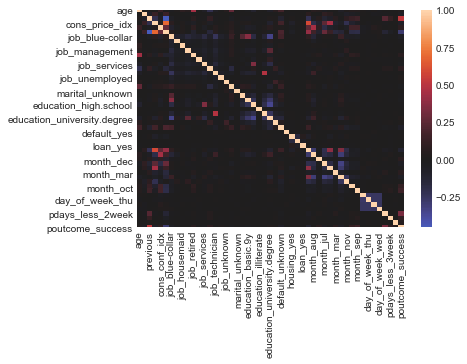

In [50]:
sns.heatmap(features.corr(), center =0)

In [51]:
pd.concat([features, target],axis=1).corr().y

age                              0.030399
campaign                        -0.066357
previous                         0.230181
cons_price_idx                  -0.136211
cons_conf_idx                    0.054878
euribor3m                       -0.307771
job_blue-collar                 -0.074423
job_entrepreneur                -0.016644
job_housemaid                   -0.006505
job_management                  -0.000419
job_retired                      0.092221
job_self-employed               -0.004663
job_services                    -0.032301
job_student                      0.093955
job_technician                  -0.006149
job_unemployed                   0.014752
job_unknown                     -0.000151
marital_married                 -0.043398
marital_unknown                  0.005211
education_basic.6y              -0.023517
education_basic.9y              -0.045135
education_high.school           -0.007452
education_illiterate             0.007246
education_professional.course    0

#### create `result` object to save the data

In [52]:
data_before_scaled = result()
data_before_scaled.data ={'df':df,
                         'features':features,
                         'target':target}
data_before_scaled.note = """df: dummie variable step is done but no colunms 
                                    are dropped for removing collinearity
                            features: dummie variable step 
                                        + removing columns for preventing collinearity
                                
                                """

In [53]:
Results['data_before_scaled']=data_before_scaled

# Modeling and in-depth analysis

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

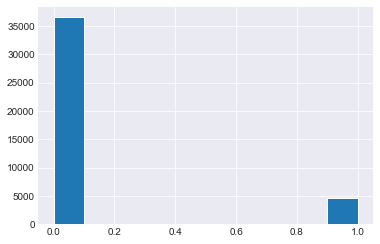

In [106]:
plt.hist(target)

#### Creating Training and Testing Sets

In [161]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 123)

#### Normalizing the Data

In [162]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_df_train = pd.DataFrame(scaled_X_train, columns = features.columns)


C:\Users\woogu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\woogu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\woogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
scaled_df_train.head()

,age,campaign,previous,cons_price_idx,cons_conf_idx,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_less_2week,pdays_less_3week,pdays_less_4week,poutcome_success
0,-1.925718,-0.204298,-0.348389,-1.603700,2.242717,-1.690131,-0.537091,-0.190611,-0.161898,-0.276367,...,-0.133763,-0.115835,-0.509885,-0.515524,-0.495129,2.024858,-0.081332,-0.035095,-0.012723,-0.185817
1,-0.001517,-0.571621,-0.348389,-0.231279,0.945541,0.769327,-0.537091,-0.190611,-0.161898,-0.276367,...,-0.133763,-0.115835,-0.509885,-0.515524,-0.495129,2.024858,-0.081332,-0.035095,-0.012723,-0.185817
2,0.190903,0.163025,-0.348389,1.531289,-0.286776,0.764700,1.861881,-0.190611,-0.161898,-0.276367,...,-0.133763,-0.115835,-0.509885,-0.515524,-0.495129,-0.493862,-0.081332,-0.035095,-0.012723,-0.185817
3,-0.290147,-0.204298,-0.348389,0.586994,-0.481353,0.767014,-0.537091,5.246289,-0.161898,-0.276367,...,-0.133763,-0.115835,-0.509885,-0.515524,-0.495129,2.024858,-0.081332,-0.035095,-0.012723,-0.185817
4,0.768164,0.163025,-0.348389,0.718194,0.880682,0.704544,-0.537091,-0.190611,-0.161898,-0.276367,...,-0.133763,-0.115835,-0.509885,1.939773,-0.495129,-0.493862,-0.081332,-0.035095,-0.012723,-0.185817


#### Creat `result` object to save the data

In [164]:
data_preprocessed = result({'random_state':123, 'test_size':0.25})
data_preprocessed.data = {'scaled_X_train':scaled_X_train,
                         'scaled_X_test':scaled_X_test,
                         'scaled_df_train':scaled_df_train,
                         'y_train':y_train,
                         'y_test':y_test}

#### Add the object to the dictionary `Results` to be pickled

In [165]:
Results['data_preprocessed'] = data_preprocessed

#### Evaluating models

In [166]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels,preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    

## Dimension Reduction using PCA (Principal Component Analysis)

In [167]:
pca = PCA()
X_pca = pca.fit_transform(scaled_X_train)

In [168]:
len(X_pca[0])

49

#### Plot the cumulative sum of information contained by number of columns

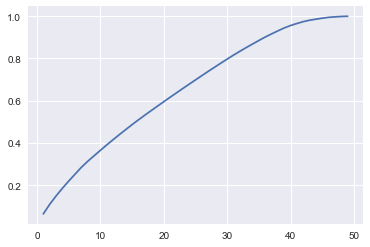

In [170]:
plt.plot(range(1,50), pca.explained_variance_ratio_.cumsum())

#### Determine the Number of Features to Capture 95% of the Datasets Variance

In [171]:
scaled_X_train.shape

(30891, 49)

In [172]:
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])

n_to_reach_95 = scaled_X_train.shape[1] - n_over_95 + 1

print(f"Number features: {n_to_reach_95}\t Total Variance Explained:{total_explained_variance[n_to_reach_95-1]}")

Number features: 40	 Total Variance Explained:0.9561945269726482


In [173]:
pca = PCA(n_components = n_to_reach_95)
X_pca_train =pca.fit_transform(scaled_X_train)
pca.explained_variance_ratio_.cumsum()[-1]

0.9561945269726482

In [174]:
X_pca_test = pca.transform(scaled_X_test)

#### Create `result` object to save the data

In [175]:
PCA = result({'n_to_reach_95':n_to_reach_95} )
PCA.data ={'X_pca_train':X_pca_train, 'X_pca_test':X_pca_test}

In [176]:
PCA.__dict__

{'params': {'n_to_reach_95': 40},
 'preds': None,
 'data': {'X_pca_train': array([[ 2.77529357, -0.91374374, -2.36794077, ...,  0.23532002,
          -1.02199317, -0.20040633],
         [ 0.82529707,  2.36628367, -0.37294761, ...,  0.06737178,
           0.38125493, -0.28286083],
         [-3.07809402, -0.59044314,  1.20370447, ...,  0.51238014,
          -0.36076321, -0.9069181 ],
         ...,
         [-0.13738743,  1.55806785, -0.25399493, ..., -0.34140088,
           0.57310839,  0.14442504],
         [ 2.30963171, -2.21408628, -1.26832283, ..., -1.52545113,
          -0.39136641, -0.08104255],
         [-0.51808354,  1.02308781, -1.27757383, ..., -0.34199245,
          -1.19633766,  1.17453259]]),
  'X_pca_test': array([[-2.47887651, -0.55651182, -1.16409644, ..., -0.19246588,
          -0.50087939, -0.23263253],
         [ 1.74021481, -0.8936656 ,  2.93644176, ...,  1.30851156,
          -0.09782119,  0.39371562],
         [-2.75962565, -1.51622599,  2.2717859 , ..., -0.01779819

#### Add the object to the dictionary `Result` to be pickled

In [177]:
Results['PCA'] = PCA

## KNN(K Nearest Neighbors)

In [178]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(scaled_X_train, y_train)
test_preds = clf_knn.predict(scaled_X_test)

In [179]:
print_metrics(y_test, test_preds)

Precision Score: 0.5168918918918919
Recall Score: 0.2586644125105664
Accuracy Score: 0.8870544818879286
F1 Score: 0.3447887323943662


In [180]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    #Your code here
    best_k =0
    best_score = 0
    scores =[]
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        scores.append(f1)
        if f1>best_score:
            best_k =k
            best_score = f1
    print("Best Value for k:{}".format(best_k))
    print("F1-Score:{}".format(best_score))
    return scores

In [181]:
find_best_k(scaled_X_train, y_train, scaled_X_test, y_test, min_k = 1, max_k = 11)

Best Value for k:11
F1-Score:0.3460166468489893


[0.3176265270506108,
 0.34548335974643424,
 0.3447887323943662,
 0.3350724637681159,
 0.32959243945658595,
 0.3460166468489893]

In [182]:
find_best_k(scaled_X_train, y_train, scaled_X_test, y_test, min_k = 13, max_k = 25)

Best Value for k:17
F1-Score:0.3433476394849785


[0.3395320935812837,
 0.33495736906211937,
 0.3433476394849785,
 0.3341553637484587,
 0.3401360544217687,
 0.32630272952853595,
 0.32961586121437425]

From searches of optimal K from 1 to 25, we found that F1 is maximized when K = 3. 

In [183]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(scaled_X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [184]:
train_preds = clf_knn.predict(scaled_X_train)
print_metrics(y_train, train_preds)

Precision Score: 0.7503573130061935
Recall Score: 0.4555973387330055
Accuracy Score: 0.9221132368651064
F1 Score: 0.5669546436285098


In [185]:
test_preds = clf_knn.predict(scaled_X_test)
print_metrics(y_test, test_preds)

Precision Score: 0.46056338028169014
Recall Score: 0.2764158918005072
Accuracy Score: 0.8796736913664174
F1 Score: 0.34548335974643424


In [186]:
clf_knn.fit(scaled_X_train, y_train)
train_knn_acc = clf_knn.score(scaled_X_train, y_train)
test_knn_acc = clf_knn.score(scaled_X_test, y_test)
print(f'Traning Accuracy:{train_knn_acc}\t Testing Accuracy:{test_knn_acc}' )

Traning Accuracy:0.9221132368651064	 Testing Accuracy:0.8796736913664174


#### Create `result` object to save the data

In [187]:
KNN_optimized = result({'k':3},
                       {'train_preds':train_preds,'test_preds':test_preds},
                      )

In [188]:
KNN_optimized.print_metrics()

Train set

Precision Score: 0.7503573130061935
Recall Score: 0.4555973387330055
Accuracy Score: 0.9221132368651064
F1 Score: 0.5669546436285098


Test set

Precision Score: 0.46056338028169014
Recall Score: 0.2764158918005072
Accuracy Score: 0.8796736913664174
F1 Score: 0.34548335974643424




#### Add the object to the dictionary `Result` to be pickled

In [189]:
Results['KNN_optimized'] = KNN_optimized

### KNN with PCA

In [190]:
find_best_k(X_pca_train, y_train, X_pca_test, y_test, min_k = 1, max_k = 11)

Best Value for k:3
F1-Score:0.32085561497326204


[0.29594063727629855,
 0.32085561497326204,
 0.3125720876585929,
 0.3206197854588796,
 0.30466830466830463,
 0.30683918669131244]

Since the optimal k value is still 3 we keep using the same setup. 

In [191]:
clf_knn.fit(X_pca_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [192]:
train_preds_pca = clf_knn.predict(X_pca_train)
test_preds_pca = clf_knn.predict(X_pca_test)

#### Create `result` object to save the data

In [193]:
KNN_PCA = result({'k':3,'n_to_reach_95':n_to_reach_95}, 
                {'train_preds':train_preds_pca,'test_preds':test_preds_pca})
KNN_PCA.data =PCA.data

In [194]:
KNN_PCA.print_metrics()

Train set

Precision Score: 0.7528200098087298
Recall Score: 0.44402661266994503
Accuracy Score: 0.9214657991000615
F1 Score: 0.5585880640465793


Test set

Precision Score: 0.4366812227074236
Recall Score: 0.25359256128486896
Accuracy Score: 0.8766631057589589
F1 Score: 0.32085561497326204




#### Add the object to the dictionary `Results` to be pickled

In [195]:
Results['KNN_PCA']=KNN_PCA

## Random Forest

#### Constructing function to plot feature importances

In [196]:
def plot_feature_importances(model):
    n_features = scaled_X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

#### Baseline random forest model

In [197]:
forest = RandomForestClassifier(max_depth = 5, n_estimators =100)

In [198]:
forest.fit(scaled_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
train_preds_forest = forest.predict(scaled_X_train)

In [200]:
print_metrics(y_train, train_preds_forest)

Precision Score: 0.7567567567567568
Recall Score: 0.15389065663870408
Accuracy Score: 0.8997766339710596
F1 Score: 0.2557692307692308


In [201]:
test_preds_forest = forest.predict(scaled_X_test)

In [202]:
print_metrics(y_test, test_preds_forest)

Precision Score: 0.7777777777777778
Recall Score: 0.15976331360946747
Accuracy Score: 0.898222783334952
F1 Score: 0.2650771388499299


The accuracy scores and precision scores are pretty high but recall scores are low for both the train and test set. a low recall score means that many of actual positives are predicted to be false negatives. 

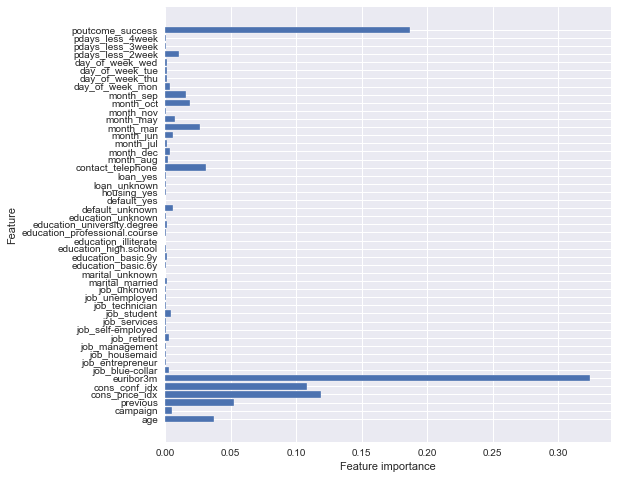

In [203]:
plot_feature_importances(forest)

### Tunning hyper-parameters individually 

#### Max_depth

First we plot the accuracy scores and the F-1 scores with varied `max_depth` value from 1 to 30.

C:\Users\woogu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woogu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


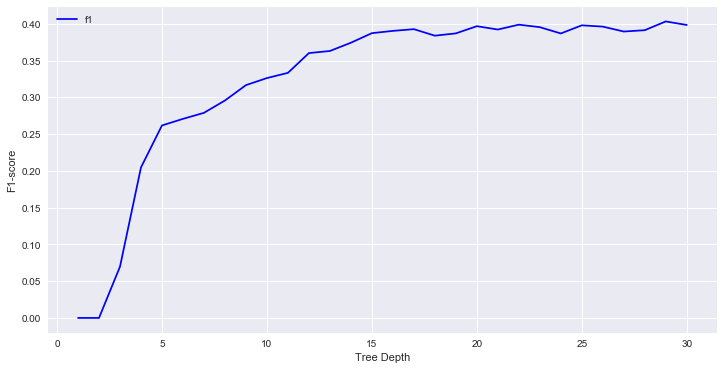

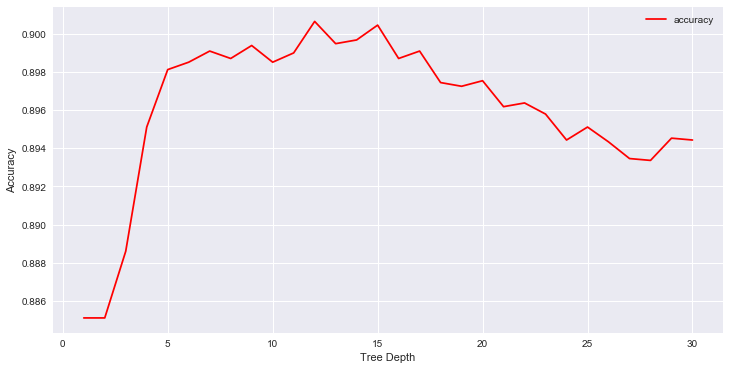

In [204]:
max_depths = np.linspace(1,30,30, endpoint= True)
accuracy_results = []
f1_results = []

for max_depth in max_depths:
    forest = RandomForestClassifier(max_depth = max_depth, n_estimators =100)
    forest.fit(scaled_X_train, y_train)
    y_pred = forest.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_results.append(f1)
    accuracy_results.append(accuracy)
    
plt.figure(figsize =(12,6))
plt.plot(max_depths, f1_results,'b', label='f1')
plt.xlabel('Tree Depth')
plt.ylabel('F1-score')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(max_depths, accuracy_results,'r', label = 'accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It looks like the accuracy and F1 scores are getting steady for max_depth values between 10 to 15 so we plot narrower range of max_depth values.

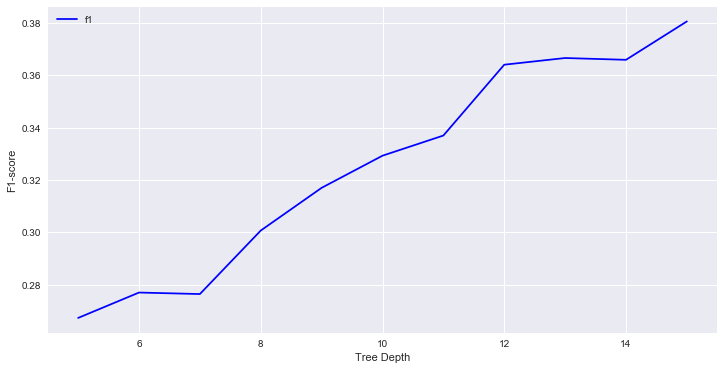

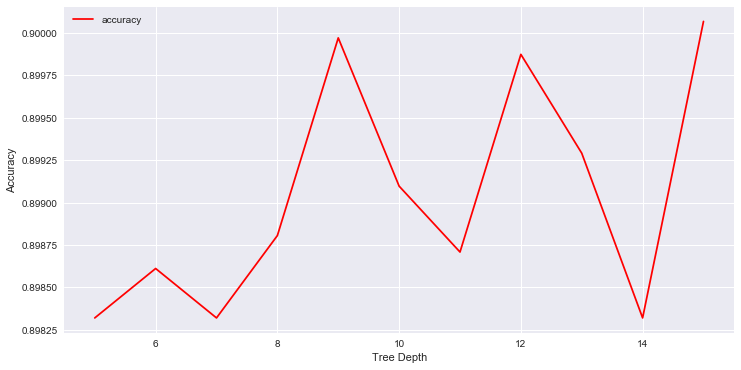

In [210]:
max_depths = np.linspace(5,15,11, endpoint= True)
accuracy_results = []
f1_results = []

for max_depth in max_depths:
    forest = RandomForestClassifier(max_depth = max_depth, n_estimators =100)
    forest.fit(scaled_X_train, y_train)
    y_pred = forest.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_results.append(f1)
    accuracy_results.append(accuracy)
    
plt.figure(figsize =(12,6))
plt.plot(max_depths, f1_results,'b', label='f1')
plt.xlabel('Tree Depth')
plt.ylabel('F1-score')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(max_depths, accuracy_results,'r', label = 'accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy is maximized when `max_depth` is between 12 and 15. 

#### `min_samples_split`

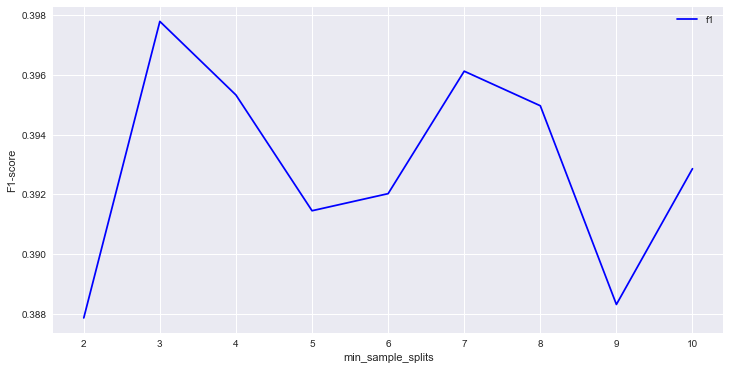

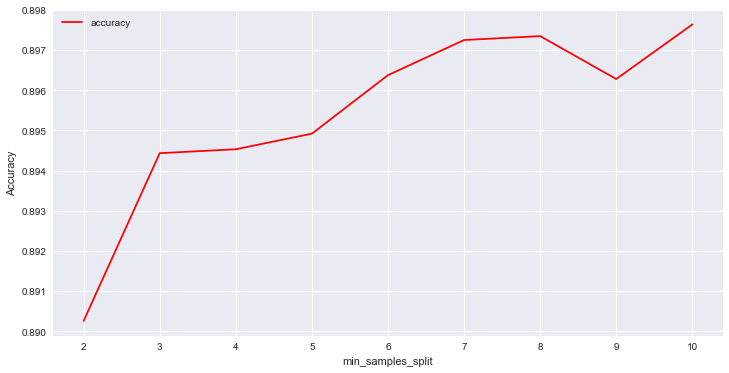

In [214]:
min_samples_splits =np.arange(2,11)
accuracy_results = []
f1_results = []

for min_samples_split in min_samples_splits:
    forest = RandomForestClassifier( min_samples_split = min_samples_split, n_estimators =100,random_state=123)
    forest.fit(scaled_X_train, y_train)
    y_pred = forest.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_results.append(f1)
    accuracy_results.append(accuracy)
    
plt.figure(figsize =(12,6))
plt.plot(min_samples_splits, f1_results,'b', label='f1')
plt.xlabel('min_sample_splits')
plt.ylabel('F1-score')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(min_samples_splits, accuracy_results,'r', label = 'accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the graphs above, the F1 score fluctuates and the accuracy score keeps increasing as `min_samples_split`. So we plot little further. 

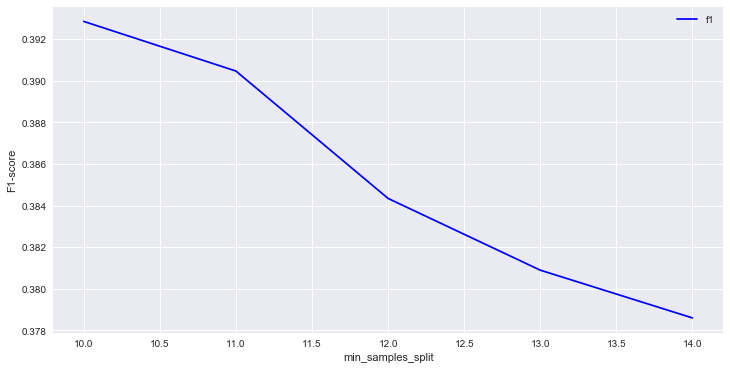

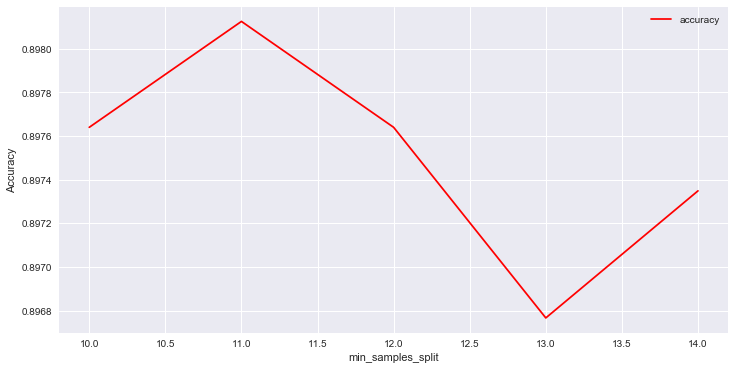

In [215]:
min_samples_splits =np.arange(10, 15)
accuracy_results = []
f1_results = []

for min_samples_split in min_samples_splits:
    forest = RandomForestClassifier( min_samples_split = min_samples_split, n_estimators =100,random_state=123)
    forest.fit(scaled_X_train, y_train)
    y_pred = forest.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_results.append(f1)
    accuracy_results.append(accuracy)
    
plt.figure(figsize =(12,6))
plt.plot(min_samples_splits, f1_results,'b', label='f1')
plt.xlabel('min_samples_split')
plt.ylabel('F1-score')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(min_samples_splits, accuracy_results,'r', label = 'accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We see that the scores are at the peak when `min_samples_split` is 7,8, and 11. 

#### `min_samples_leaf`

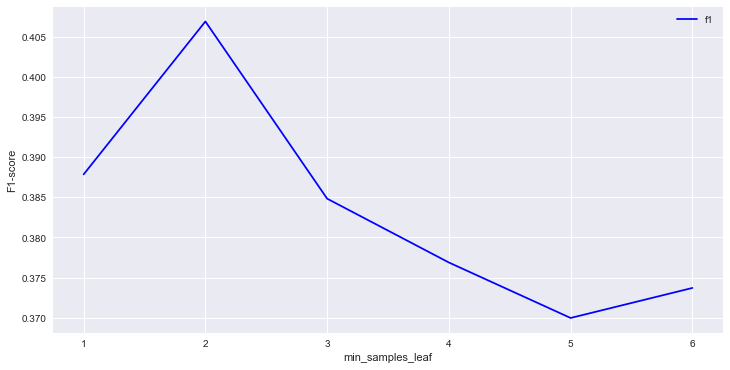

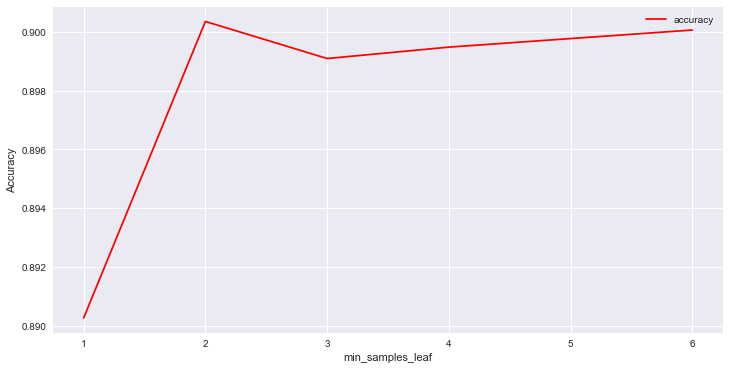

In [216]:
min_samples_leafs =np.arange(1,7)
accuracy_results = []
f1_results = []

for min_samples_leaf in min_samples_leafs:
    forest = RandomForestClassifier(min_samples_leaf = min_samples_leaf, n_estimators =100,random_state=123)
    forest.fit(scaled_X_train, y_train)
    y_pred = forest.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_results.append(f1)
    accuracy_results.append(accuracy)
    
plt.figure(figsize =(12,6))
plt.plot(min_samples_leafs, f1_results,'b', label='f1')
plt.xlabel('min_samples_leaf')
plt.ylabel('F1-score')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(min_samples_leafs, accuracy_results,'r', label = 'accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It is obvious that the accuracy and the F1 scores are maximized when `min_samples_leaf` is 2.

#### The baseline cross validation result  for the random forest model

In [217]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, scaled_X_train, y_train, cv=3))
print("Mean Cross Validation Score for Random Forest Classifier:{:.4}%".format(mean_rf_cv_score*100))

C:\Users\woogu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\woogu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Cross Validation Score for Random Forest Classifier:88.89%


C:\Users\woogu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Grid search cross validation

We make a dictionary of hyper-parameters that yield the maximum accuracy and check what combination of those values maximize the scores. 

In [219]:
rf_param_grid = {
    'n_estimators':[50,100],
    'criterion':['gini','entropy'],
    'max_depth':[12,15],
    'min_samples_split':[7,8,11],
    'min_samples_leaf':[2]
}

In [220]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv =3)
rf_grid_search.fit(scaled_X_train, y_train)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 90.01%
Optimal Parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 50}


#### The optimized random forest model 

In [221]:
forest = RandomForestClassifier(criterion='gini',
                                max_depth = 12,
                                n_estimators =50,
                               min_samples_leaf =2,
                               min_samples_split=11)

In [222]:
forest.fit(scaled_X_train,y_train)
train_preds_forest = forest.predict(scaled_X_train)
test_preds_forest = forest.predict(scaled_X_test)

In [223]:
print_metrics(y_train, train_preds_forest)

Precision Score: 0.8253692441355344
Recall Score: 0.27480474399768584
Accuracy Score: 0.9123369266129293
F1 Score: 0.4123263888888889


In [224]:
print_metrics(y_test, test_preds_forest)

Precision Score: 0.6967418546365914
Recall Score: 0.23499577345731193
Accuracy Score: 0.9003593279595998
F1 Score: 0.35145385587863465


From the precision, recall, F1 scores, the model is over-fitting but the accuracy scores for two prediction sets are very similar which is a good sign.  

#### Plotting feature importance 

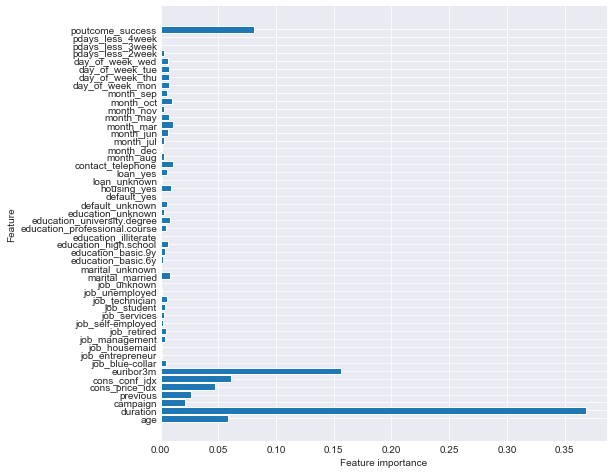

In [58]:
plot_feature_importances(forest)

Text(0.5, 1.0, 'Feature Importance')

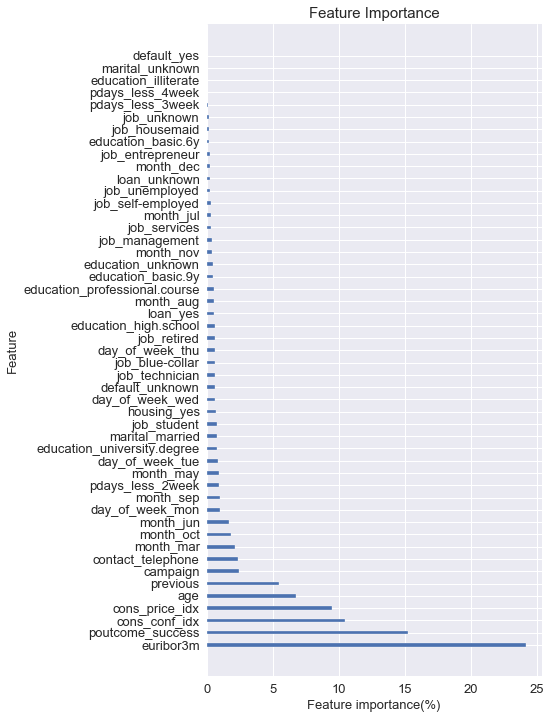

In [238]:
plt.style.use('seaborn')
col = [x[0] for x in pairs]
val =[x[1]*100 for x in pairs]
fig, ax = plt.subplots(figsize= (6,12))
plt.barh(col, val, align='center',height=0.3)
ax.set_xlabel('Feature importance(%)',fontsize =13)
ax.set_ylabel('Feature', fontsize = 13)
plt.setp(ax.get_xticklabels(), fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=13)

plt.title('Feature importance'.title(), fontsize=15)



#### Plotting top 7 feature importance

In [225]:
pairs = list(zip(scaled_df_train.columns,forest.feature_importances_))
pairs.sort(key= lambda x:x[1],reverse=True)

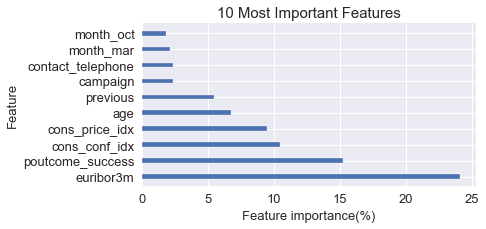

In [237]:
plt.style.use('seaborn')
col = [x[0] for x in pairs[:10]]
val =[x[1]*100 for x in pairs[:10]]
# val =[x[1] for x in pairs]
# sum(val[:5])
fig, ax = plt.subplots(figsize=(6,3))
plt.barh(col, val, align='center',height=0.3)
ax.set_xlabel('Feature importance(%)',fontsize =13)
ax.set_ylabel('Feature', fontsize = 13)

plt.setp(ax.get_xticklabels(), fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=13)

plt.title('10 most important features'.title(), fontsize=15)

fig.savefig('feature_importance.png', dpi=400, bbox_inches="tight")#saving fig



In [239]:
vals =[x[1]*100 for x in pairs[:5]]
sum(vals)

66.03336251882456

In [240]:
vals =[x[1]*100 for x in pairs[:7]]
sum(vals)

73.91196311579328

In [227]:
sum(val)

66.03336251882456

In [241]:
rand_forest_optimized = result({'criterion': 'gini',
                                'max_depth': 12,
                                'min_samples_leaf': 2,
                                'min_samples_split': 11,
                                'n_estimators': 50},
                              {'train_preds':train_preds_forest,
                              'test_preds':test_preds_forest},
                              )
rand_forest_optimized.data = {'scaled_X_train':scaled_X_train,
                             'scaled_X_test':scaled_X_test}


In [242]:
Results['rand_forest_optimized'] = rand_forest_optimized

In [243]:
Results.keys()

dict_keys(['data_preprocessed', 'KNN_optimized', 'PCA', 'KNN_PCA', 'rand_forest_optimized'])

#### Interpreting features

In [260]:
pd.concat([features, target], axis=1).corr().y

age                              0.030399
campaign                        -0.066357
previous                         0.230181
cons_price_idx                  -0.136211
cons_conf_idx                    0.054878
euribor3m                       -0.307771
job_blue-collar                 -0.074423
job_entrepreneur                -0.016644
job_housemaid                   -0.006505
job_management                  -0.000419
job_retired                      0.092221
job_self-employed               -0.004663
job_services                    -0.032301
job_student                      0.093955
job_technician                  -0.006149
job_unemployed                   0.014752
job_unknown                     -0.000151
marital_married                 -0.043398
marital_unknown                  0.005211
education_basic.6y              -0.023517
education_basic.9y              -0.045135
education_high.school           -0.007452
education_illiterate             0.007246
education_professional.course    0

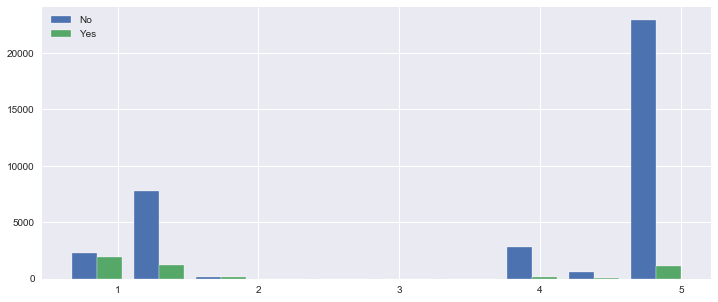

In [251]:
rate_by_y=[]
for answer in df.y.unique():
    rate_by_y.append(df[df.y == answer].euribor3m) 
fig = plt.figure(figsize =(12,5))
plt.hist(rate_by_y, label =['No', 'Yes'])
# plt.ylabel('number of orders'.title(), fontsize =15)
# plt.xlabel('category'.title(), fontsize =15)
# plt.rc('xtick', labelsize = 13)
# plt.rc('ytick', labelsize = 15)
# plt.title('Total number of orders sorted by categories'.title(), fontsize =20)
plt.legend()
plt.show()x

# Comparing results for models

In [82]:
def generate_row(labels, preds):
    new_row = dict()
    new_row["Precision Score"]=precision_score(labels, preds)
    new_row["Recall Score"]=recall_score(labels,preds)
    new_row["Accuracy Score"]=accuracy_score(labels, preds)
    new_row["F1 Score"]=f1_score(labels, preds)
    return new_row

In [191]:
Model_Results_train = pd.DataFrame(columns=['Precision Score','Recall Score','Accuracy Score', 'F1 Score'])
Model_Results_test = pd.DataFrame(columns=['Precision Score','Recall Score','Accuracy Score', 'F1 Score'])

In [192]:
indexes = []
for i, name in enumerate(Results.keys()):
    if i in [1,3,4]:
        indexes.append(name)
        print(indexes)
        a = generate_row(y_train,Results[name].preds['train_preds'])
        b = generate_row(y_test,Results[name].preds['test_preds'])
        Model_Results_train= Model_Results_train.append(a, ignore_index=True)
        Model_Results_test= Model_Results_test.append(b, ignore_index=True)


['KNN_optimized']
['KNN_optimized', 'KNN_PCA']
['KNN_optimized', 'KNN_PCA', 'rand_forest_optimized']


In [193]:
indexes[2]='RandomForest_optimized'

In [194]:
Model_Results_train.index = indexes
Model_Results_test.index = indexes
Model_Results_train

,Precision Score,Recall Score,Accuracy Score,F1 Score
KNN_optimized,0.750357,0.455597,0.922113,0.566955
KNN_PCA,0.752820,0.444027,0.921466,0.558588
RandomForest_optimized,0.825369,0.274805,0.912337,0.412326


In [195]:
Model_Results_test

,Precision Score,Recall Score,Accuracy Score,F1 Score
KNN_optimized,0.460563,0.276416,0.879674,0.345483
KNN_PCA,0.436681,0.253593,0.876663,0.320856
RandomForest_optimized,0.696742,0.234996,0.900359,0.351454


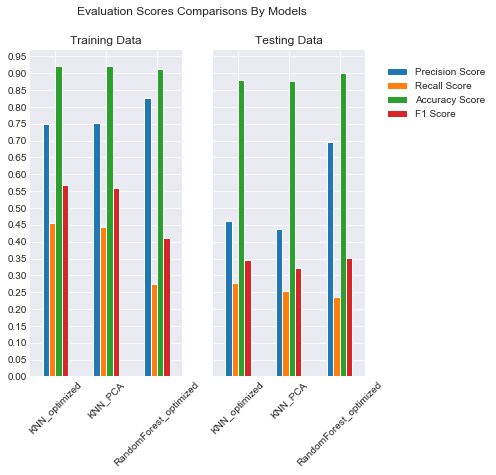

In [187]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10), sharey= True)
Model_Results_train.plot(kind='bar',figsize=[6,6], ax = axes[0])
axes[0].set_title('Training Data')
axes[0].set_yticks([0.05*x for x in range(20)])
axes[0].legend(bbox_to_anchor=(1.2,0.7), loc="lower right",  bbox_transform=fig.transFigure)

Model_Results_test.plot(kind='bar',figsize=[6,6], ax = axes[1])
axes[1].set_title('Testing Data')
axes[1].get_legend().remove()
plt.suptitle('Evaluation scores comparisons by models'.title())
for i in range(2):
    for tick in axes[i].get_xticklabels():
            tick.set_rotation(45)



Overall, the random forest model performed the best and it also provides the feature importance rankings that are very useful for interpretation.